# Лабораторная работа №2
## Были выбраны следующие датасеты:
 - ### 11. Цены на бриллианты.
 - ### 18. Цены на мобильные устройства.
 - ### 19. Данные о миллионерах.

## Начнем анализировать датасет №11.

Ссылка на исходные данные: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

**Общее описание**: Данный датасет содержит цены и атрибуты для 53940 алмазов круглой огранки. Имеются 10 характеристик (карат, огранка, цвет, чистота, глубина, таблица, цена, x, y и z). Большинство переменных являются числовыми по своей природе, но переменные cut, color и clearity являются упорядоченными факторными переменными.

**Проблемная область**: Финансовый анализ и прогнозирование цен акций.

**Объекты наблюдения**: Данные о алмазах, включающие атрибуты: _Carat, Cut, Color, Clarity, Depth, Table, Price_.

**Бизнес цели**:
- ***Прогнозирование цен на алмазы***: Позволяет покупателям и продавцам лучше ориентироваться в рыночных ценах, а также помогает в принятии решений о покупке или продаже алмазов,
- ***Анализ факторов, влияющих на стоимость***: Понимание, какие характеристики алмаза (например, качество огранки или цвет) оказывают наибольшее влияние на его цену, может помочь в разработке стратегий ценообразования и улучшении ассортимента.

**Цели технического проекта**:
1. ***Прогнозирование цен на алмазы***: Входные данные - атрибуты алмазов; целевой признак - _цена_,
2. ***Анализ факторов влияния***: Входные данные -  атрибуты, описывающие качество и характеристики алмаза; целевой признак - влияние каждого атрибута на конечную цену, что может быть проанализировано с помощью методов регрессии и визуализации данных.

In [1]:
import pandas as pd

df = pd.read_csv("./data/Diamonds-Prices.csv")
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


Атрибуты: 
- Неизвестный: 0, 
- Караты (carat), 
- Огранка (cut), 
- Цвет (color), 
- Чистота (clarity), 
- Глубина (depth), 
- Площадь огранки (table), 
- Цена (price), 
- Ширина (координата X), 
- Длина (координата Y), 
- Высота (координата Z). 

Проверяем на выбросы

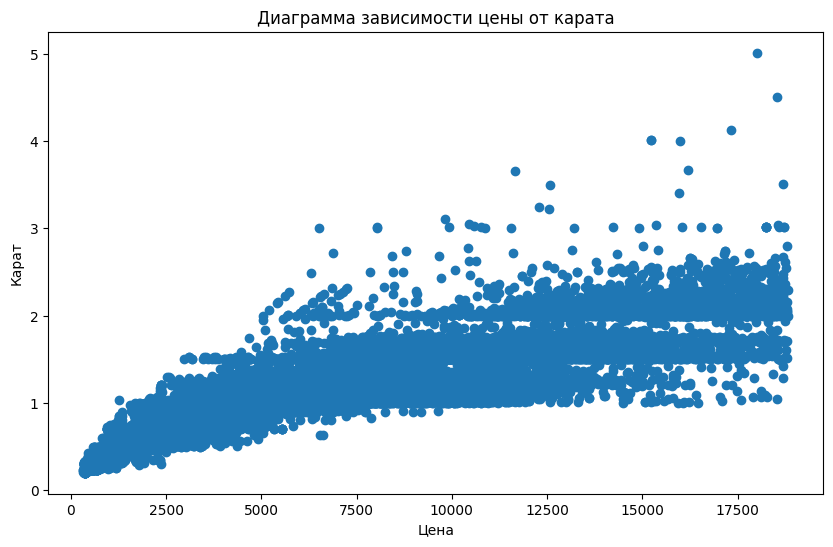

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("./data/Diamonds-Prices.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df["price"], df["carat"])
plt.xlabel("Цена")
plt.ylabel("Карат")
plt.title("Диаграмма зависимости цены от карата")
plt.show()

Выброс с наибольшим значением был замечен при ~175000
Начнем использовать метод межквантильного размаха для удаления выбросов.

In [3]:
null_values_diamond = df.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values_diamond)

duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df.describe()

Пустые значения по столбцам:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Количество дубликатов: 0

Статистический обзор данных:


Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [4]:
import numpy as np

for column in df.select_dtypes(include=[np.number]).columns:
    asymmetry = df[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {asymmetry}")


Коэффициент асимметрии для столбца 'Unnamed: 0': 0.0

Коэффициент асимметрии для столбца 'carat': 1.1167052359880187

Коэффициент асимметрии для столбца 'depth': -0.08218721424717913

Коэффициент асимметрии для столбца 'table': 0.7968359775412807

Коэффициент асимметрии для столбца 'price': 1.6184763222032386

Коэффициент асимметрии для столбца 'x': 0.37868453466912216

Коэффициент асимметрии для столбца 'y': 2.4342330799873775

Коэффициент асимметрии для столбца 'z': 1.5224810204974413


Видим выбросы. Очистим данные от шумов.

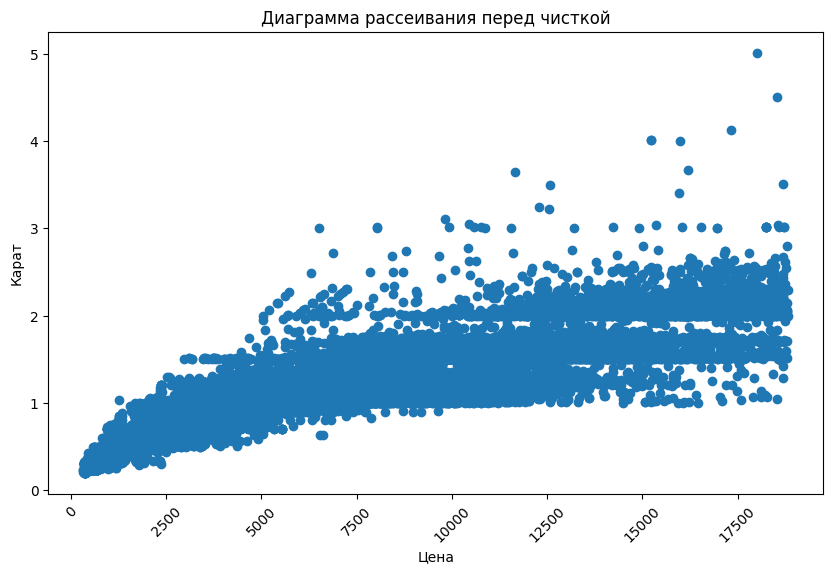

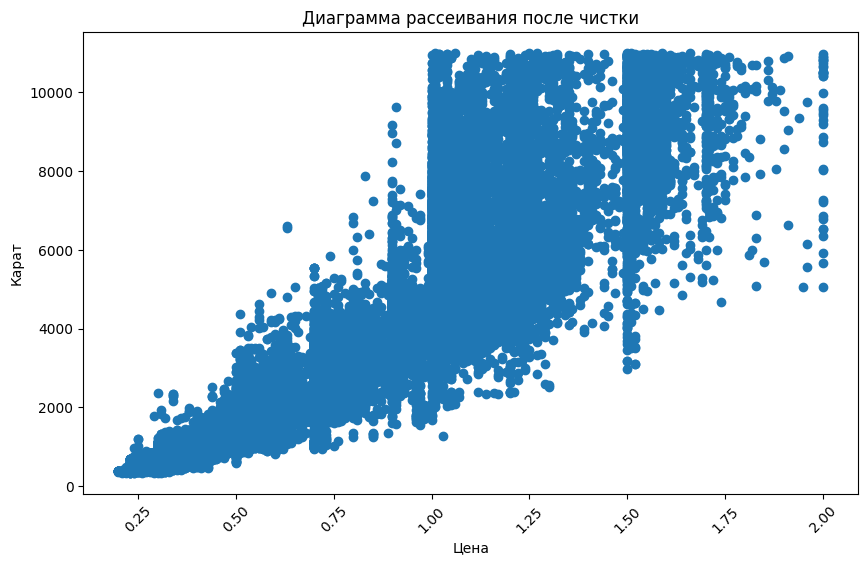

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df["price"], df["carat"])
plt.xlabel("Цена")
plt.ylabel("Карат")
plt.xticks(rotation=45)
plt.title("Диаграмма рассеивания перед чисткой")
plt.show()


# Выбираем столбцы для анализа
column1 = "carat"
column2 = "price"
# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)


plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2])
plt.xlabel("Цена")
plt.ylabel("Карат")
plt.xticks(rotation=45)
plt.title("Диаграмма рассеивания после чистки")
plt.show()

In [6]:
# Вывод количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

Количество строк до удаления выбросов: 53943
Количество строк после удаления выбросов: 49517


Перейдем к созданию выборок

In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/Diamonds-Prices.csv")

# Выбираем признаки и целевую переменную
X = df.drop("price", axis=1)  # Все столбцы, кроме цены
y = df["price"]

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 32365
Размер контрольной выборки: 10789
Размер тестовой выборки: 10789


Проанализируем сбалансированность выборок

In [8]:
def analyze_distribution(data, title):
    print(f"Распределение Price в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")
    print("\nНеобходима аугментация данных для балансировки классов.\n")


# Анализ распределения для каждой выборки
analyze_distribution(y_train, "обучающей выборке")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке:
price
327      1
334      1
336      1
337      1
338      1
        ..
18791    1
18795    2
18797    1
18804    1
18806    1
Name: count, Length: 9476, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в контрольной выборке:
price
326      2
340      1
344      1
354      1
357      1
        ..
18781    1
18784    1
18791    1
18803    1
18823    1
Name: count, Length: 5389, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в тестовой выборке:
price
335      1
336      1
337      1
351      1
353      1
        ..
18766    1
18768    1
18780    1
18788    1
18818    1
Name: count, Length: 5308, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация д

Применяем методы приращения данных

In [9]:
from imblearn.over_sampling import RandomOverSampler

# Применение oversampling к обучающей выборке
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Анализ распределения для каждой выборки
analyze_distribution(y_train_resampled, "обучающей выборке после oversampling")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке после oversampling:
price
327      85
334      85
336      85
337      85
338      85
         ..
18791    85
18795    85
18797    85
18804    85
18806    85
Name: count, Length: 9476, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в контрольной выборке:
price
326      2
340      1
344      1
354      1
357      1
        ..
18781    1
18784    1
18791    1
18803    1
18823    1
Name: count, Length: 5389, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в тестовой выборке:
price
335      1
336      1
337      1
351      1
353      1
        ..
18766    1
18768    1
18780    1
18788    1
18818    1
Name: count, Length: 5308, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0

## Начнем анализировать датасет №18.

Ссылка на исходные данные: https://www.kaggle.com/datasets/dewangmoghe/mobile-phone-price-prediction

**Общее описание**: Данный датасет содержит информацию о ценах и атрибутах для 1369 мобильных телефонов разных конфигураций и производителей. Имеются 17 характеристик (именование модели, оценка (мин - 0, макс - 5), оценка на основе характеристик (мин - 0, макс - 100), информация о поддержке 2 симок и сетевых технологий (3G, 4G, 5G, VoLTE), количество оперативной памяти, характеристики батареи, информация о дисплее, характеристики камеры, поддержка внешней памяти, версия системы Android, цена, компания-производитель, поддержка быстрой зарядки, разрешение экрана, тип процессора, название процессора).

**Проблемная область**: Финансовый анализ и прогнозирование цен на мобильные телефоны.

**Объекты наблюдения**: телефон, включающий атрибуты: _Name, Rating, Spec_score, No_of_sim, RAM, Battery, Display, Camera, External_Memory, Android_version, Price, Company, Inbuilt_memory, Fast_charging, Screen_resolution, Processor, Processor_name_.

**Бизнес цели**:
- ***Прогнозирование цен мобильные телефоны на основе оценки характеристик***.
- ***Прогнозирование оценки на основе фирмы и цены***.

**Цели технического проекта**:
1. ***Прогнозирование цен на телефоны***: Входные данные - _оценка характеристик_; целевой признак - _цена_,
2. ***Анализ факторов влияния***: Входные данные -  _фирма и цена_; целевой признак - _оценка характеристик_.

In [10]:
import pandas as pd

df = pd.read_csv("./data/mobile-phone-price-prediction.csv")
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')


Атрибуты: 
- Неизвестный: 0, 
- Наименование телефона (Name), 
- Рейтинг (Rating),
- Рейтинг на основе характеристик (Spec_score),
- Поддержка различных технологий (No_of_sim),
- Количество оперативной памяти (Ram),
- Инфо о батарее (Battery),
- Инфо о дисплее (Display),
- Инфо о камере (Camera),
- Инфо о внешней памяти (External_Memory),
- Версия Android (Android_version),
- Цена (Price),
- Компания-производитель (company),
- Инфо о внутренней памяти (Inbuilt_memory),
- Быстрая зарядка (fast_charging),
- Разрешение экрана (Screen_resolution),
- Тип процессора (Processor),
- Наименование процессора (Processor_name).

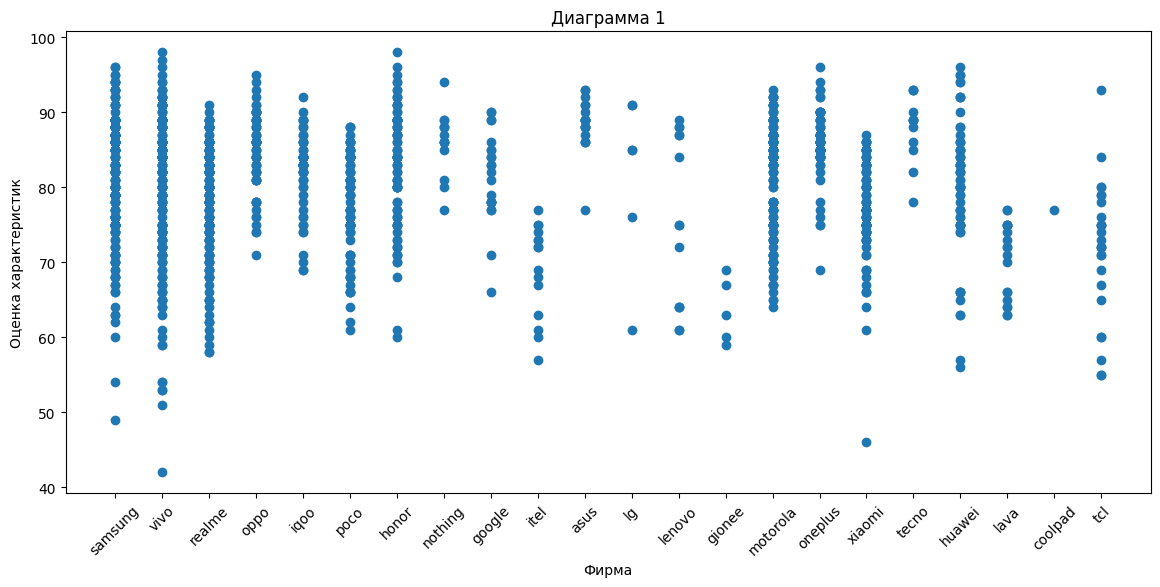

In [11]:
plt.figure(figsize=(14, 6))


plt.scatter(df["company"].str.lower(), df["Spec_score"])
plt.xlabel("Фирма")
plt.ylabel("Оценка характеристик")
plt.xticks(rotation=45)
plt.title("Диаграмма 1")
plt.show()

Между атрибутами присутствует связь. Пример, на диаграмме 1 - связь между фирмой и оценкой характеристик

Перейдем к проверке на выбросы

In [12]:
null_values = df.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df.describe()

Пустые значения по столбцам:
Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

Количество дубликатов: 0

Статистический обзор данных:


Unnamed: 0       Rating   Spec_score
count  1370.000000  1370.000000  1370.000000
mean    684.500000     4.374416    80.234307
std     395.629246     0.230176     8.373922
min       0.000000     3.750000    42.000000
25%     342.250000     4.150000    75.000000
50%     684.500000     4.400000    82.000000
75%    1026.750000     4.550000    86.000000
max    1369.000000     4.750000    98.000000

Видим, что есть пустые данные, но нет дубликатов. Удаляем их

In [13]:
def drop_missing_values(dataframe, name):
    before_shape = dataframe.shape
    cleaned_dataframe = dataframe.dropna()
    after_shape = cleaned_dataframe.shape
    print(
        f"В наборе данных '{name}' было удалено {before_shape[0] - after_shape[0]} строк с пустыми значениями."
    )
    return cleaned_dataframe


cleaned_df = drop_missing_values(df, "Phones")

В наборе данных 'Phones' было удалено 553 строк с пустыми значениями.


Рассчитаем коэффициент ассиметрии

In [14]:
import numpy as np
for column in df.select_dtypes(include=[np.number]).columns:
    asymmetry = df[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {asymmetry}")


Коэффициент асимметрии для столбца 'Unnamed: 0': 0.0

Коэффициент асимметрии для столбца 'Rating': -0.06697860128699223

Коэффициент асимметрии для столбца 'Spec_score': -0.7393772365886471


Выбросы незначительные.

Очистим данные от шумов.

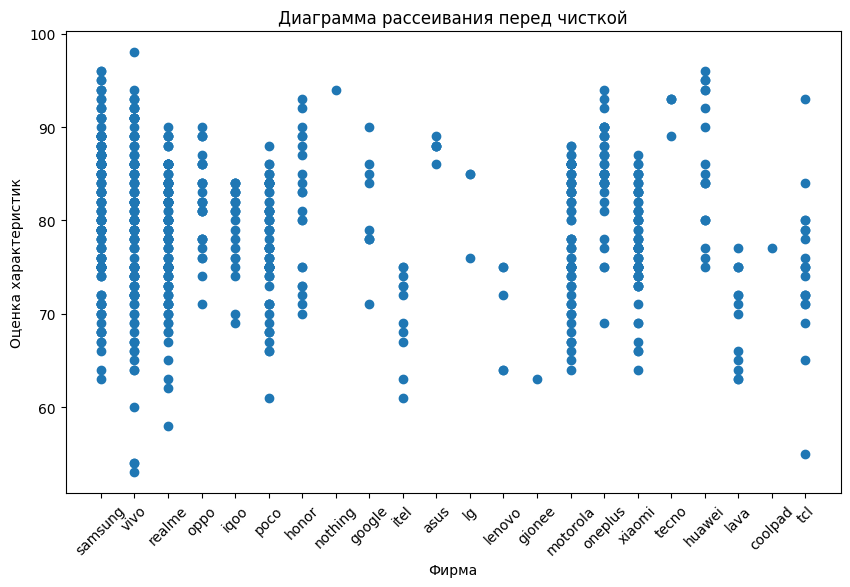

Выбросы в датасете:
      Unnamed: 0                       Name  Rating  Spec_score  \
99            99                   Vivo Y02    4.35          54   
214          214                Realme C30s    4.55          58   
802          802  Vivo Y02 (2GB RAM + 32GB)    4.50          53   
803          803                   Vivo Y02    4.35          54   
1344        1344                    TCL 501    4.25          55   

                      No_of_sim       Ram            Battery      Display  \
99    Dual Sim, 3G, 4G, VoLTE,   3 GB RAM  5000 mAh Battery   6.51 inches   
214   Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  5000 mAh Battery    6.5 inches   
802   Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  5000 mAh Battery   6.51 inches   
803   Dual Sim, 3G, 4G, VoLTE,   3 GB RAM  5000 mAh Battery   6.51 inches   
1344  Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  3000 mAh Battery      6 inches   

                                 Camera                   External_Memory  \
99    8 MP Rear &amp; 5 MP Front Came

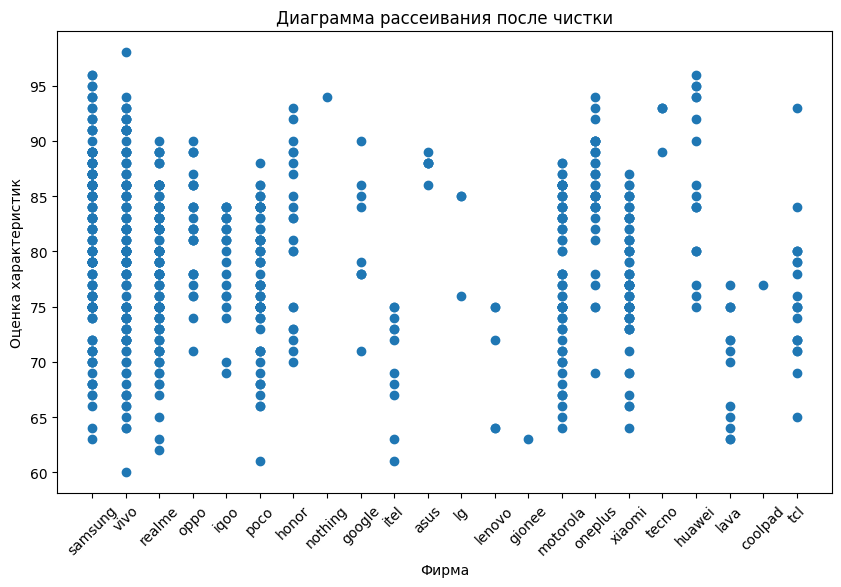

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df["company"].str.lower(), cleaned_df["Spec_score"])
plt.xlabel("Фирма")
plt.ylabel("Оценка характеристик")
plt.xticks(rotation=45)
plt.title("Диаграмма рассеивания перед чисткой")
plt.show()

Q1 = cleaned_df["Spec_score"].quantile(0.25)
Q3 = cleaned_df["Spec_score"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (cleaned_df["Spec_score"] < lower_bound) | (
    cleaned_df["Spec_score"] > upper_bound
)

print("Выбросы в датасете:")
print(cleaned_df[outliers])

median_score = cleaned_df["Spec_score"].median()
cleaned_df.loc[outliers, "Spec_score"] = median_score

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df["company"].str.lower(), cleaned_df["Spec_score"])
plt.xlabel("Фирма")
plt.ylabel("Оценка характеристик")
plt.xticks(rotation=45)
plt.title("Диаграмма рассеивания после чистки")
plt.show()

Разбиваем на выборки.

In [16]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

print()


def check_balance(df, name):
    counts = df["Spec_score"].value_counts()
    print(f"Распределение оценки характеристик в {name}:")
    print(counts)
    print()


check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Размер обучающей выборки: 489
Размер контрольной выборки: 164
Размер тестовой выборки: 164

Распределение оценки характеристик в обучающей выборке:
Spec_score
75    48
86    35
80    34
84    32
85    23
78    23
83    23
77    19
79    19
82    18
89    17
88    17
71    16
73    15
72    13
74    13
87    12
69    11
76    10
81    10
67     9
90     9
70     8
68     8
91     8
64     7
93     7
92     6
66     5
94     4
63     4
96     2
95     1
65     1
60     1
61     1
Name: count, dtype: int64

Распределение оценки характеристик в контрольной выборке:
Spec_score
75    18
81    12
74    11
79     9
82     9
85     9
84     8
86     8
76     7
78     7
77     7
83     6
89     5
71     5
72     5
80     4
70     4
88     3
68     3
65     3
73     3
67     2
87     2
63     2
95     2
93     2
90     2
94     1
66     1
92     1
69     1
98     1
61     1
Name: count, dtype: int64

Распределение оценки характеристик в тестовой выборке:
Spec_score
75    15
84    13
76    11
82  

Оверсемплинг и андерсемплинг

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y)

    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df


def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y)

    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, "Spec_score")
val_df_oversampled = oversample(val_df, "Spec_score")
test_df_oversampled = oversample(test_df, "Spec_score")

train_df_undersampled = undersample(train_df, "Spec_score")
val_df_undersampled = undersample(val_df, "Spec_score")
test_df_undersampled = undersample(test_df, "Spec_score")

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение оценки характеристик в обучающей выборке:
Spec_score
85    48
78    48
75    48
82    48
64    48
73    48
79    48
87    48
86    48
80    48
70    48
83    48
68    48
74    48
71    48
72    48
66    48
93    48
77    48
88    48
69    48
89    48
84    48
94    48
76    48
95    48
90    48
63    48
81    48
67    48
91    48
92    48
96    48
65    48
60    48
61    48
Name: count, dtype: int64

Распределение оценки характеристик в контрольной выборке:
Spec_score
75    18
94    18
72    18
82    18
70    18
74    18
68    18
88    18
71    18
80    18
92    18
86    18
66    18
81    18
84    18
79    18
73    18
76    18
67    18
95    18
78    18
85    18
83    18
77    18
89    18
98    18
69    18
90    18
87    18
65    18
63    18
93    18
61    18
Name: count, dtype: int64

Распределение оценки характеристик в тестовой выборке:
Spec_score
80    15
94    15
82    15
77    15
75    15
79    15
96    15
83    15
76    15
71    15
64    15
78    15
8

## Начнем анализировать датасет №19.

Ссылка на исходные данные: https://www.kaggle.com/datasets/surajjha101/forbes-billionaires-data-preprocessed

**Общее описание**: «Миллиардеры мира» — это ежегодный рейтинг документально подтвержденного состояния богатейших миллиардеров мира, который составляется и публикуется ежегодно в марте американским деловым журналом Forbes. Список был впервые опубликован в марте 1987 года. Общий собственный капитал каждого человека в списке оценивается и указывается в долларах США на основе их документально подтвержденных активов, а также с учетом долга и других факторов. Члены королевской семьи и диктаторы, чье богатство обусловлено их положением, исключены из этих списков. Этот рейтинг представляет собой индекс самых богатых задокументированных людей, исключая любой рейтинг тех, кто обладает богатством, которое невозможно полностью установить.

**Проблемная область**: Анализ состояния, возраста и источников богатства самых богатых людей в мире.

**Объекты наблюдения**: Богатейшие люди мира, представленные в датасете.

**Связи между объектами**: можно выявить следующие связи:
- Между возрастом и состоянием
- Между страной проживания и источником дохода
- Между отраслью бизнеса и уровнем благосостояния.

**Бизнес цели**:
- ***Понять факторы успеха:***: Исследовать, какие факторы (возраст, страна, источник дохода) влияют на высокие состояния. Это может помочь новым предпринимателям и стартапам учиться на опыте успешных людей.
- ***Анализ тенденций богатства***: Понимание как источники богатства меняются со временем и как это связано с экономическими условиями в разных странах. Это непременно поможет инвесторам и аналитикам определить, какие секторы могут быть наиболее перспективными для инвестиций в будущем.  

**Цели технического проекта**:
1. ***Исследование факторов успеха***: Входные данные - данные о богатейших людях (возраст, чистая стоимость, индустрия); целевой признак - выявление факторов, способствующих накоплению состояния.
2. ***Анализ тенденций богатства***: Входные данные - данные о богатейших людях (возраст, страна, источник богатства); целевой признак - наличие зависимости между источником богатства и страной.

In [18]:
import pandas as pd

df = pd.read_csv("./data/Forbes Billionaires.csv")
print(df.columns)

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


Атрибуты:
- Ранг (Rank),
- Имя (Name),
- Общая стоимость (Networth),
- Возраст (Age),
- Страна (Country),
- Источник дохода(Source),
- Индустрия (Industry).

Посмотрим на связи.

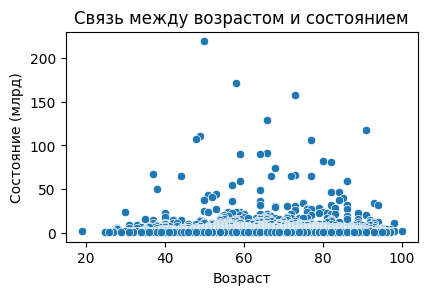

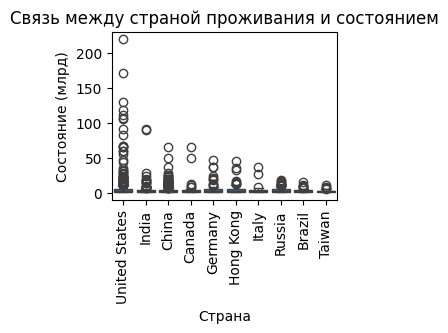

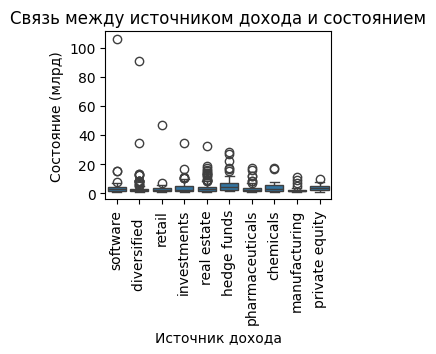

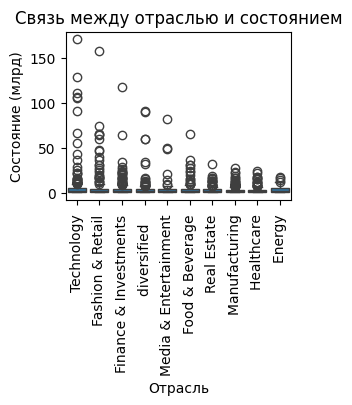

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Связь между возрастом и состоянием
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="Age", y="Networth")
plt.title("Связь между возрастом и состоянием")
plt.xlabel("Возраст")
plt.ylabel("Состояние (млрд)")
plt.show()


# Связь между страной проживания и состоянием (топ-10 стран)
plt.subplot(2, 2, 2)
top_countries = df["Country"].value_counts().index[:10]
sns.boxplot(data=df[df["Country"].isin(top_countries)], x="Country", y="Networth")
plt.title("Связь между страной проживания и состоянием")
plt.xticks(rotation=90)
plt.xlabel("Страна")
plt.ylabel("Состояние (млрд)")
plt.show()


# Связь между источником дохода и состоянием (топ-10 источников дохода)
plt.subplot(2, 2, 3)
top_sources = df["Source"].value_counts().index[:10]
sns.boxplot(data=df[df["Source"].isin(top_sources)], x="Source", y="Networth")
plt.title("Связь между источником дохода и состоянием")
plt.xticks(rotation=90)
plt.xlabel("Источник дохода")
plt.ylabel("Состояние (млрд)")
plt.show()

# Связь между отраслью и состоянием (топ-10 отраслей)
plt.subplot(2, 2, 4)
top_industries = df["Industry"].value_counts().index[:10]
sns.boxplot(data=df[df["Industry"].isin(top_industries)], x="Industry", y="Networth")
plt.title("Связь между отраслью и состоянием")
plt.xticks(rotation=90)
plt.xlabel("Отрасль")
plt.ylabel("Состояние (млрд)")
plt.show()

Перейдем к выявлению выбросов.

In [20]:
missing_values = df.isnull().sum()
print("Пропущенные значения в данных:\n", missing_values)

Пропущенные значения в данных:
 Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64


Пропущенных данных не найдено.


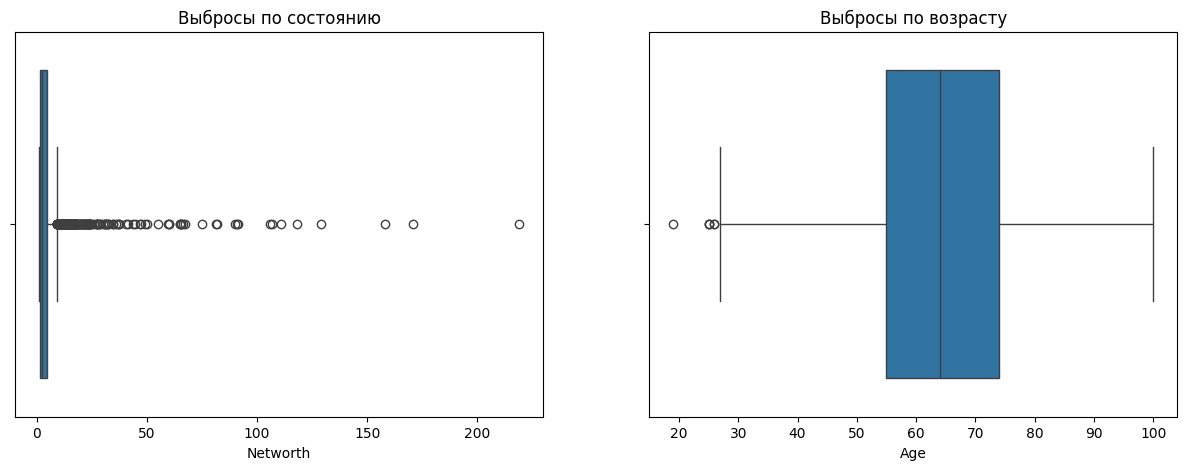

Размер данных до удаления выбросов:  (2600, 7)


In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='Networth', ax=axs[0])
axs[0].set_title("Выбросы по состоянию")

sns.boxplot(data=df, x="Age", ax=axs[1])
axs[1].set_title("Выбросы по возрасту")

plt.show()
print("Размер данных до удаления выбросов: ", df.shape)

Выбросов в данном случае не видно, данные в районе допустимых значений

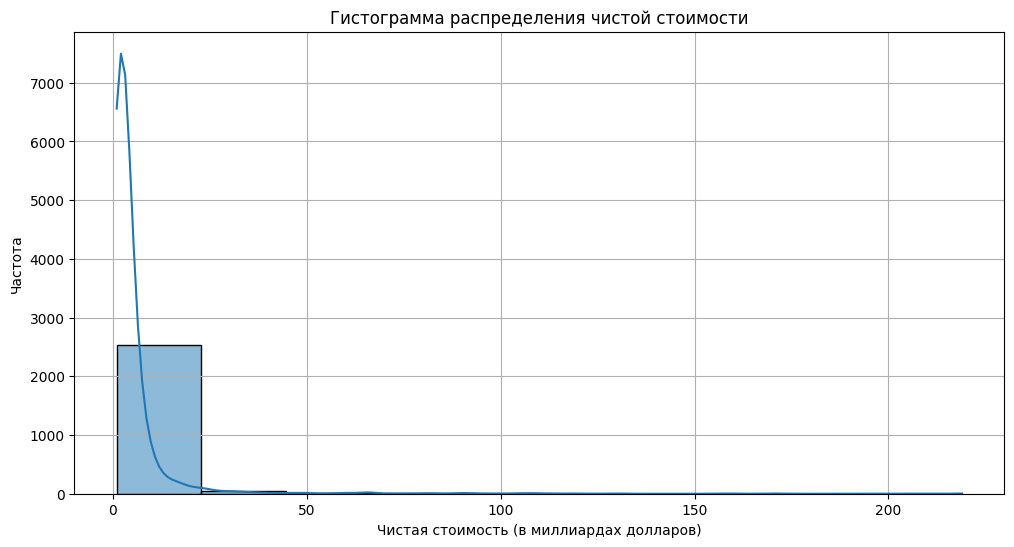

In [22]:
# Гистограмма распределения чистой стоимости
plt.figure(figsize=(12, 6))
sns.histplot(df['Networth'], bins=10, kde=True)
plt.title("Гистограмма распределения чистой стоимости")
plt.xlabel("Чистая стоимость (в миллиардах долларов)")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

Распределение чистой стоимости имеет ярко выраженное смещение: большая часть значений сосредоточена в нижнем диапазоне, с небольшим количеством высоких значений. Это указывает на преобладание людей с относительно низкой чистой стоимостью, тогда как у немногих (например, миллиардеров) чистая стоимость крайне высока.

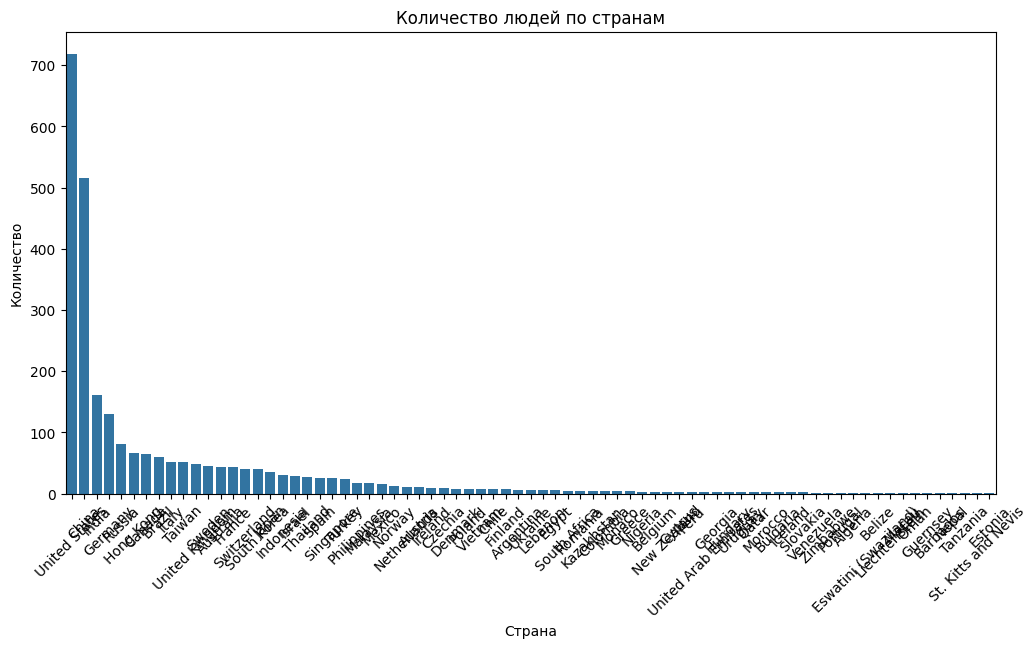

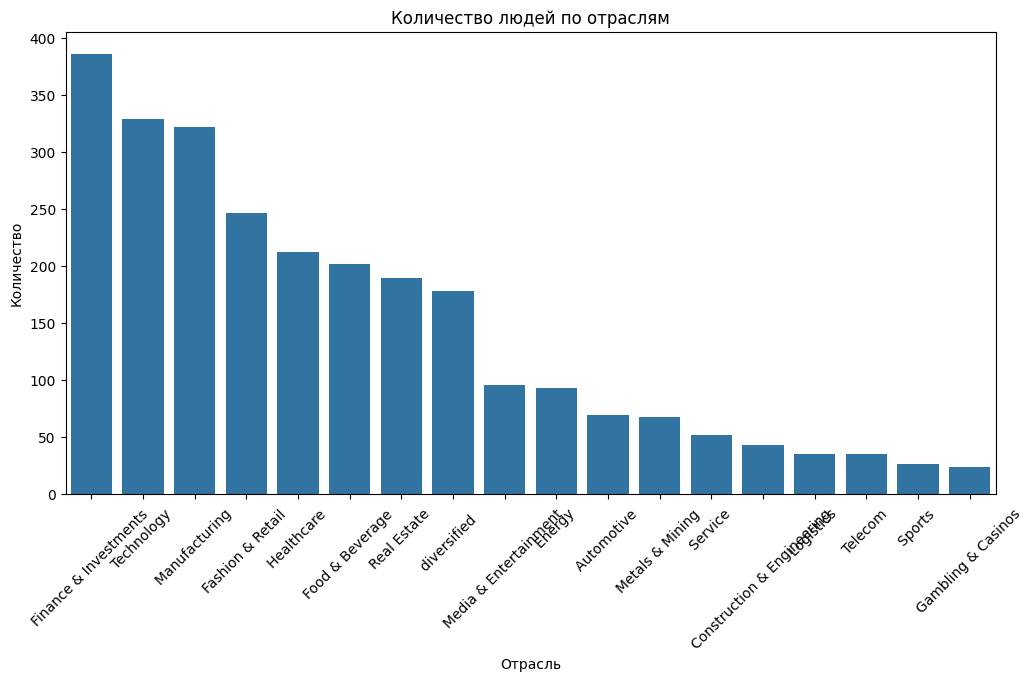

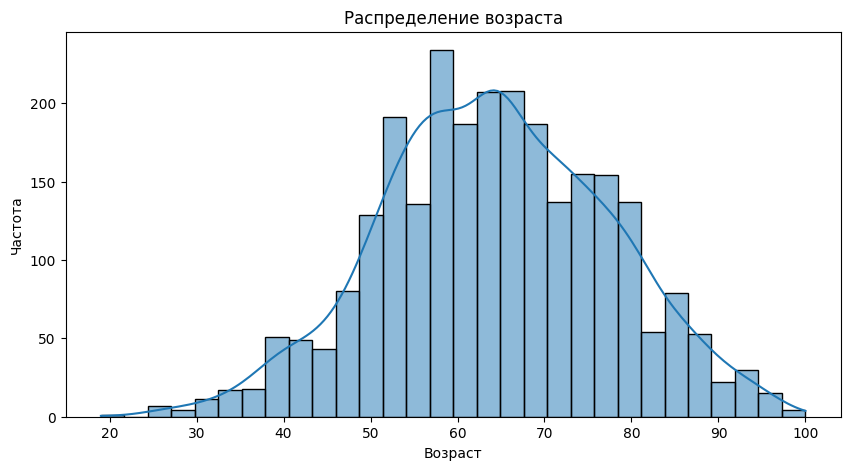

In [23]:
# 1. Столбчатая диаграмма по странам
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Country", order=df["Country"].value_counts().index)
plt.title("Количество людей по странам")
plt.xlabel("Страна")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

# 2. Столбчатая диаграмма по отраслям
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Industry", order=df["Industry"].value_counts().index)
plt.title("Количество людей по отраслям")
plt.xlabel("Отрасль")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

# 3. Гистограмма для анализа возраста
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

Графики демонстрируют разнообразие стран и отраслей, представленных в наборе данных, что указывает на охват данных по множеству регионов и различных сфер деятельности.

Разбиваем набор данных на обучающую, контрольную и тестовую выборки

In [24]:
from sklearn.model_selection import train_test_split

# Разделим набор данных на признаки (X) и целевой признак (y)
X = df.drop(columns=["Networth"])
y = df["Networth"]

# Разделение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Проверка размера выборок
(X_train.shape, X_val.shape, X_test.shape)

((1560, 6), (520, 6), (520, 6))

In [25]:
# Проверка распределения целевого признака по выборкам
train_dist = y_train.describe()
val_dist = y_val.describe()
test_dist = y_test.describe()

train_dist, val_dist, test_dist

(count    1560.000000
 mean        5.208173
 std        12.653032
 min         1.000000
 25%         1.500000
 50%         2.400000
 75%         4.300000
 max       219.000000
 Name: Networth, dtype: float64,
 count    520.000000
 mean       4.443654
 std        7.267615
 min        1.000000
 25%        1.500000
 50%        2.400000
 75%        4.825000
 max       91.400000
 Name: Networth, dtype: float64,
 count    520.000000
 mean       4.235577
 std        5.861496
 min        1.000000
 25%        1.600000
 50%        2.500000
 75%        4.500000
 max       60.000000
 Name: Networth, dtype: float64)

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

oversampler = RandomOverSampler(random_state=12)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=12)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Размеры после oversampling:", X_train_over.shape, y_train_over.shape)
print("Размеры после undersampling:", X_train_under.shape, y_train_under.shape)

Размеры после oversampling: (17954, 6) (17954,)
Размеры после undersampling: (191, 6) (191,)
